# Philippines' Freedom of Information website scraper

**Publicly available records from December 7, 2021 onwards**

Below scrapes and processes requests data from the Philippines' Freedom of Information website **(www.foi.gov.ph)**. The goal is to create a single database of these requests and analyze them such as:

Which agency received the most number of requests?

How many requests had been denied/approved?

What type of requests are most common?

Some background: The FOI website is in compliance with Executive Order No. 2, Series of 2016 by President Rodrigo Duterte that institutionalized freedom of information in the Executive branch of government. 

This project is **ongoing.**

## Do your imports

In [1]:
import pandas as pd

import time
import requests
import re

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

from webdriver_manager.chrome import ChromeDriverManager

from bs4 import BeautifulSoup

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Open a new browser to be automatically controlled by Selenium

In [2]:
driver = webdriver.Chrome(ChromeDriverManager().install())



====== WebDriver manager ======
Could not get version for google-chrome with the any command: /Applications/Google\ Chrome.app/Contents/MacOS/Google\ Chrome --version
Current google-chrome version is UNKNOWN
Get LATEST chromedriver version for UNKNOWN google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/97.0.4692.71/chromedriver_mac64.zip
Driver has been saved in cache [/Users/prinzmagtulis/.wdm/drivers/chromedriver/mac64/97.0.4692.71]
/var/folders/01/dz49lpcd4qq_yksvf114xzfc0000gn/T/ipykernel_2463/1503906442.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [3]:
driver.get("https://www.foi.gov.ph/requests")

Note: That is the part of the website supposedly containing all FOI requests.

## Start locating and isolating elements

Some methods are:

By.TAG

By.CLASS_NAME

By.ID

By.XPATH

By.CSS_SELECTOR

In [4]:
tabs = driver.find_elements(By.CLASS_NAME, "col-xxs-12 col-xs-12 col-sm-8")

Used **BeautifulSoup** on this part just because I want to clearly see the elements I need to **isolate**.

In [5]:
my_url = "https://www.foi.gov.ph/requests"
foi_html = requests.get(my_url).content
#print(type(foi_html))
#print(foi_html)

#foi_list = BeautifulSoup(foi_html, "html.parser")
#print(type(foi_list))
#print(foi_list.prettify())

## Actual scraping

Now comes the main part: interacting with the pages and setting Selenium to scrape each page. We then put scraped information in a **list of dictionaries** and then into a **single data frame.** 

Kudos to my friend, Vincent, for some help in using **CSS_SELECTOR** as a locator since I'm not familiar with it.

In [6]:
dataset = []
while True:
    try:
        print('Reading a page')
        WebDriverWait(driver, 4).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, ".col-xxs-12.col-xs-12.col-sm-8"))
        )
        tabs = driver.find_elements(By.CSS_SELECTOR, ".col-xxs-12.col-xs-12.col-sm-8")
        for tab in tabs:
            try:
                all_div = tab.find_elements(By.CSS_SELECTOR, '.component-panel')
            except:
                break
            for div in all_div[1:]:
                data={}
                data ['agency'] = div.find_element(By.TAG_NAME, 'span').text
                data ['date'] = div.find_element(By.TAG_NAME, 'p').get_attribute('title')
                data ['title'] = div.find_element(By.TAG_NAME, 'h4').text
                data ['status'] = div.find_element(By.TAG_NAME, 'label').text
                data ['filer'] = div.find_elements(By.TAG_NAME, 'span')[1].text
                data ['purpose'] = div.find_elements(By.TAG_NAME, 'span')[2].text
                data ['tracking no.'] = div.find_elements(By.TAG_NAME, 'span')[4].text
                data ['link'] = div.find_element(By.TAG_NAME, 'a').get_attribute('href')
                dataset.append(data)
    except:
        break

    try:
        driver.find_element(By.XPATH, "/html/body/section/div/div/div/div[2]/div/div/div/a").click()
    except:
        print("Nothing more.")
        break

Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a page
Reading a 

## Generate your data frame

This is now all pandas.

So, some caveats:

First, the **ALL REQUESTS** tab apparently only contains data for about the past 40 or so days (in this case from **December 7, 2021**). Hence, we can only scrape until that level-- that represent only or **about 6%** of what the website says as **"93,373 requests"**.

Second, I tried looking into the other tabs namely **SUCCESSFUL REQUESTS**, **PROCESSING REQUESTS**, and **UNSUCCESSFUL REQUESTS**, it seems they have earlier request data but I'm assuming that they are also not complete. Second, some data in those tabs may actually be **duplicates** of those in **ALL REQUESTS** tab.

In [7]:
df = pd.DataFrame(dataset)
df

,agency,date,title,status,filer,purpose,tracking no.,link
0,BIR,"January 16, 2022",Tin Id Legitimately Verification,PENDING,K. Cecilia,Tin id Verification request,#BIR-259272970688,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
1,DOLE,"January 16, 2022",Dole akap assistance,PENDING,E. Leones,Family support assistance,#DOLE-860724716906,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
2,DOH,"January 16, 2022",update my booster vaccination online info.,PENDING,J. Pastoral,travel abroad,#DOH-060065805561,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
3,DOH,"January 16, 2022",Request of Vax Cert,PENDING,K. Cayan,For further proof that I am fully vaccinated,#DOH-387855717091,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
4,BIR,"January 16, 2022",Certificate of Non Filing of Income,PENDING,J. Aquino,College Scholarship,#BIR-927767842683,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
...,...,...,...,...,...,...,...,...
5973,PCHRD,"December 07, 2021",Number of Filipino Virologists/Microbiologists...,REFERRED,C. Melgar,Architectural Thesis,#PCHRD-559313302015,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
5974,DICT,"December 07, 2021",Correction of Vaccination Record/Info,PENDING,F. CHENG,FOR TRAVEL PURPOSE,#DICT-496518657775,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
5975,DOH,"December 07, 2021",Vaccination Certificates,SUCCESSFUL,L. Barcelo,Domestic Flight Requirement,#DOH-733622847196,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
5976,DOH,"December 07, 2021",The number of reported type 2 diabetic cases (...,SUCCESSFUL,B. de Loyola,For our thesis paper,#DOH-839812343744,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...


## Cleaning the data

### Convert date to datetimes

In [8]:
df.dtypes

agency          object
date            object
title           object
status          object
filer           object
purpose         object
tracking no.    object
link            object
dtype: object

In [9]:
df.date = pd.to_datetime(df.date)
df.head(20)

,agency,date,title,status,filer,purpose,tracking no.,link
0,BIR,2022-01-16,Tin Id Legitimately Verification,PENDING,K. Cecilia,Tin id Verification request,#BIR-259272970688,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
1,DOLE,2022-01-16,Dole akap assistance,PENDING,E. Leones,Family support assistance,#DOLE-860724716906,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
2,DOH,2022-01-16,update my booster vaccination online info.,PENDING,J. Pastoral,travel abroad,#DOH-060065805561,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
3,DOH,2022-01-16,Request of Vax Cert,PENDING,K. Cayan,For further proof that I am fully vaccinated,#DOH-387855717091,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
4,BIR,2022-01-16,Certificate of Non Filing of Income,PENDING,J. Aquino,College Scholarship,#BIR-927767842683,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
5,PAGASA,2022-01-16,Rainfall Station Data,PENDING,B. Godinez,Research,#PAGASA-192793631811,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
6,NTC,2022-01-16,Stolen Device Case,PENDING,M. Villarin,Locate my Device,#NTC-793535784415,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
7,DOH,2022-01-16,VAXCERT,PENDING,J. Evangelio,Daily Used as Vaccine Card proof,#DOH-115118252104,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
8,DOH,2022-01-16,Missing Dose Vax Cert Ph LEANDRO SILVALLANA,PENDING,R. Silvallana,For work travel of my father in dumaguete,#DOH-736163174624,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
9,PAGASA,2022-01-16,List and Location of all Rainfall stations in ...,PENDING,B. Godinez,Research,#PAGASA-475873076401,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...


In [67]:
df.columns=df.columns.str.replace(" ", "_")

### Remove duplicates

Looking into the data, there were instances when individuals file similar cases with the same agency (almost always one after the other). These, we consider duplicates and can be dropped for analysis.

However, a same complaint filed with **different agencies** will NOT be considered duplicates.

In [69]:
df.duplicated(subset= 'tracking_no.').value_counts()
#There are over 1,000 duplicate entries. 

False    4655
dtype: int64

In [70]:
df2 = df.drop_duplicates(ignore_index=True)
df2

,agency,date,title,status,filer,purpose,tracking_no.,link
0,BIR,2022-01-16,Tin Id Legitimately Verification,PENDING,K. Cecilia,Tin id Verification request,#BIR-259272970688,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
1,DOLE,2022-01-16,Dole akap assistance,PENDING,E. Leones,Family support assistance,#DOLE-860724716906,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
2,DOH,2022-01-16,update my booster vaccination online info.,PENDING,J. Pastoral,travel abroad,#DOH-060065805561,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
3,DOH,2022-01-16,Request of Vax Cert,PENDING,K. Cayan,For further proof that I am fully vaccinated,#DOH-387855717091,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
4,BIR,2022-01-16,Certificate of Non Filing of Income,PENDING,J. Aquino,College Scholarship,#BIR-927767842683,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
...,...,...,...,...,...,...,...,...
4650,PCHRD,2021-12-07,Number of Filipino Virologists/Microbiologists...,REFERRED,C. Melgar,Architectural Thesis,#PCHRD-559313302015,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
4651,DICT,2021-12-07,Correction of Vaccination Record/Info,PENDING,F. CHENG,FOR TRAVEL PURPOSE,#DICT-496518657775,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
4652,DOH,2021-12-07,Vaccination Certificates,SUCCESSFUL,L. Barcelo,Domestic Flight Requirement,#DOH-733622847196,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
4653,DOH,2021-12-07,The number of reported type 2 diabetic cases (...,SUCCESSFUL,B. de Loyola,For our thesis paper,#DOH-839812343744,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...


### Look for null entries

In [71]:
df2.isna().value_counts()
#No null entries detected.

agency  date   title  status  filer  purpose  tracking_no.  link 
False   False  False  False   False  False    False         False    4655
dtype: int64

## Initial analysis

## How many FOI requests had been granted, denied?

Note though that this does not consider the number of days by which agencies should respond to a request. That information we will soon get by scraping the contents of the links to each requests provided under the 'link' column in the df.

In [72]:
df2.status.value_counts(normalize=True)*100

SUCCESSFUL                38.367347
PENDING                   16.541353
DENIED                    15.832438
REFERRED                   8.571429
PARTIALLY SUCCESSFUL       8.077336
AWAITING CLARIFICATION     5.757250
ACCEPTED                   5.349087
PROCESSING                 1.203008
EXTENDED                   0.300752
Name: status, dtype: float64

Interpretation: Around 39% of FOI requests from December 7 to present had been granted, while 8% were deemed "partially granted." Nearly 16% were denied.

Around 7% were "accepted" or "processing", indicating that the request was received by the agency and in the process of collating info to satisfy request.

<AxesSubplot:>

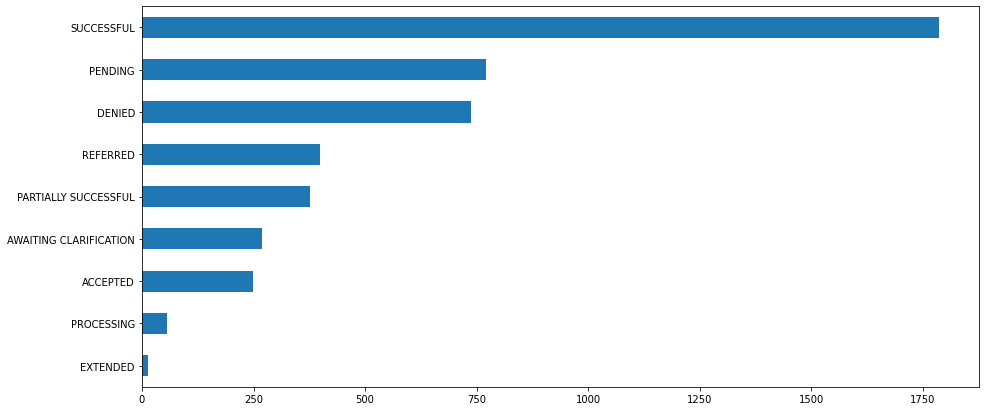

In [73]:
df2.status.value_counts().sort_values().plot(kind='barh', figsize=(15,7))

## What kind of requests were denied?

In [74]:
df2[df2.status=="DENIED"]
#The reason for denial is found in a communication located through each link of the request.

,agency,date,title,status,filer,purpose,tracking_no.,link
48,BIR,2022-01-15,Income Tax Return,DENIED,R. Cantiga,For tax filing and employment purposes,#BIR-428561757498,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
73,SEC,2022-01-15,Online lending harrassment,DENIED,M. Tumangday,To close all online lending apps who harrass a...,#SEC-636665646194,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
91,BIR,2022-01-15,Income Tax Return Form 2316,DENIED,D. Earnshaw,Personal Loan,#BIR-442713135005,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
101,BIR,2022-01-14,A copy of my latest ITR form 2316,DENIED,A. Eugenio,For personal purposes,#BIR-764092290354,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
109,MWSSCO,2022-01-14,LWUA Standard Specifications For Water System ...,DENIED,J. Orpilla,Reference and basis in work.,#MWSSCO-145651344763,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
...,...,...,...,...,...,...,...,...
4619,NAMRIA,2021-12-07,"Information for Coordinates BLLM 235, Cad-275 ...",DENIED,B. DELIGERO,For Lot study and plotting purposes,#DENRNAMRIA-995595697707,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
4623,CVSU,2021-12-07,Monthly Domestic Electric Consumption in regio 4a,DENIED,J. Bilanegue,Research,#CVSU-078138847878,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
4627,DOE,2021-12-07,Average monthly household electrical consumpti...,DENIED,l. reveral,Research,#DOE-497968472091,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
4629,DOT,2021-12-07,Virtual Reality’s Influence on Philippine Tour...,DENIED,D. Catama,Research,#DOT-844017865424,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...


## What kind of requests were approved?

Most recent 25.

In [86]:
granted = ['SUCCESSFUL', 'PARTIALLY SUCCESSFUL']
df2[df2['status'].isin(granted)].head(25)

,agency,date,title,status,filer,purpose,tracking_no.,link
96,GSIS,2022-01-15,Financial Assistance - PUM/SQ twice in a row,SUCCESSFUL,J. Beljera,Financial Assistance,#GSIS-268772091825,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
157,USEP,2022-01-14,INC Form,SUCCESSFUL,R. Ybañez,Completion of Grade,#USEP-166195568658,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
183,BLGF,2022-01-14,Koronadal City Revenue Code,SUCCESSFUL,C. Allona,For reference. Local Business Tax.,#BLGF-459785408578,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
200,DepEd,2022-01-14,NCAE RESULT,SUCCESSFUL,M. Rojas,Requirements for Scholarship,#DepEd-658510673802,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
208,NBI,2022-01-14,The Jomo app scam,SUCCESSFUL,D. Bonbonga,To report a scammed and help me.,#NBI-983068425954,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
214,BSWM,2022-01-14,Land Cover and Land Use map of the Philippines,SUCCESSFUL,B. Godinez,Research,#BSWM-051262932417,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
218,DOLE,2022-01-14,Omnibus Rules to Implement the Labor Code,SUCCESSFUL,D. Serrano,Personal Copy,#DOLE-825984286086,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
223,NBI,2022-01-14,"Hinihingian po ako ng 45, 000 pesos",SUCCESSFUL,M. Baler,Scammers,#NBI-286753555060,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
225,NBI,2022-01-14,Scamed by Online Gadget Seller,SUCCESSFUL,D. Morola,Refund of my payment,#NBI-234304452831,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
231,DepEd,2022-01-14,Diploma,SUCCESSFUL,E. Lugtu,For work purposes,#DepEd-589027283022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...


## What kind of requests were commonly filed?

Top 10

In [76]:
df2.title.value_counts().head(10)

Vaccination Certificate                                                                                 108
Income Tax Return                                                                                        52
Vaxcert                                                                                                  34
Vaccine Certificate                                                                                      32
VaxCert                                                                                                  23
Vax Cert                                                                                                 21
ITR                                                                                                      20
Medical Assistance for Husband's Angiogram & AngioplastyMedical Assistance for Husband's Angiogram &     19
Vaccination certificate                                                                                  19
VACCINATION CERTIFICATE     

## Which agencies received the most FOI requests?

In [77]:
df2.agency.value_counts().head(10)

DOH      814
BIR      255
NTC      250
DepEd    179
PSA      172
NBI      152
DICT     134
DOLE     134
OWWA     123
SSS      119
Name: agency, dtype: int64

Interpretation: The Department of Health, which is leading the fight against the pandemic, has received the most number of FOI requests since December 7, 2021.

As can be gleaned from records above, some of these requests pertained to "vaccine certificates" which mostly pertain to people looking for their electronic Covid-19 vaccine certificates, and not request for public records as what the FOI is originally intended for.

## Track the number of FOI requests

Note: This does not count duplicated filings as we already cleaned them out beforehand.

### Daily

In [78]:
#Arranged from highest to lowest number of FOI filings. Top 10 shown.
df2.resample('D', on='date').title.size().sort_values(ascending=False).head(10)

date
2021-12-13    271
2021-12-10    233
2021-12-09    227
2022-01-11    186
2022-01-13    171
2022-01-05    164
2022-01-14    163
2022-01-12    162
2022-01-10    162
2021-12-14    161
Name: title, dtype: int64

Text(0, 0.5, 'Requests')

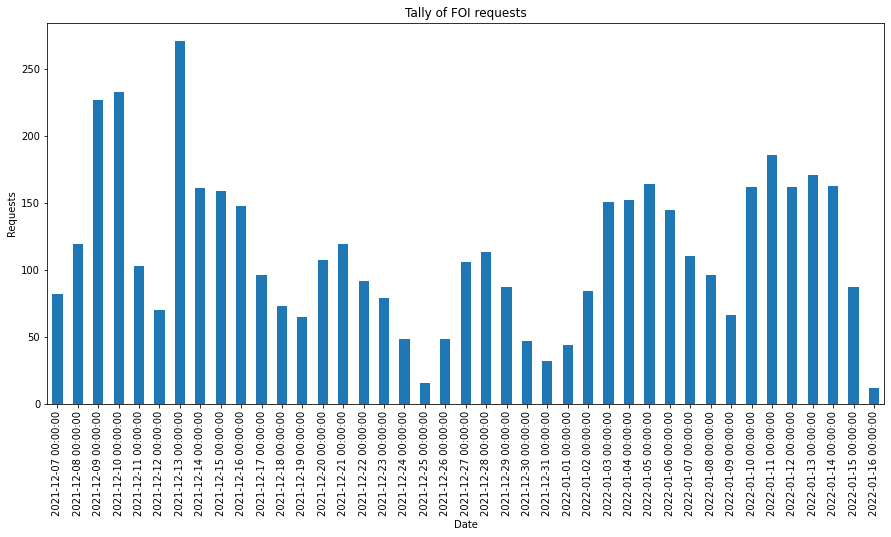

In [79]:
#Arranged by date
ax = df2.resample('D', on='date').title.size().plot(kind='bar', figsize = (15, 7), title= "Tally of FOI requests")
ax.set_xlabel("Date")
ax.set_ylabel("Requests")

### Monthly

In [80]:
df2.resample('M', on='date').title.size()

date
2021-12-31    2700
2022-01-31    1955
Freq: M, Name: title, dtype: int64

## By agency

In [81]:
df2[df2.agency=="OVP"]

,agency,date,title,status,filer,purpose,tracking_no.,link
100,OVP,2022-01-14,Financial assistance,PENDING,A. Gutierrez,Financial bill sa ospital,#OVP-272722751752,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
244,OVP,2022-01-14,finacial assistance,PENDING,M. Luma-ad,financial assistance,#OVP-872583766935,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
573,OVP,2022-01-12,Requesting for Financial/ Medical Assistance f...,PENDING,E. Silvestre,Requesting for Financial/ Medical Assistance f...,#OVP-275608967431,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
664,OVP,2022-01-11,Medical Assistance for my Premature Baby confi...,PENDING,P. Lacanaria,For medical assistance to help pay off our ris...,#OVP-972758278798,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
666,OVP,2022-01-11,Medical Assistance for my Premature Baby confi...,PENDING,P. Lacanaria,For medical assistance to help pay off our ris...,#OVP-299896349286,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
...,...,...,...,...,...,...,...,...
4514,OVP,2021-12-08,3RD OPERATION BLADDER CANCER,DENIED,L. Bermudez,"To extend the life of my father, kinakapos na ...",#OVP-708272598349,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
4515,OVP,2021-12-08,Medical financial assistance,DENIED,R. Manuel,Para po sa anak q my rheumatic heart disease.....,#OVP-452857467019,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
4539,OVP,2021-12-08,Medical Assistance for Heart Surgery,DENIED,J. DEL VALLE,Para madugtungan pa ang buhay ko.,#OVP-466722804642,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
4568,OVP,2021-12-08,MEDICAL ASSISTANCE FOR LIVER CANCER PATIENT,DENIED,L. Motol,for the advised procedure to be done to remove...,#OVP-703888519827,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...


In [82]:
df2[df2.agency=="OVP"].purpose.str.contains("assistance", regex=False, case=False).value_counts()

False    63
True     50
Name: purpose, dtype: int64

Interpretation: 44% of FOI filings for OVP mention the word **"assistance."**

19% mention **"financial assistance."**
                
15% mention **"medical assistance."**

The Office of the Vice President is known for its poverty alleviation programs.

## SALN requests?

Stands for 'Statements of Assets, Liabilities, and Net Worth' filed by a government official every year.

In [110]:
df2.title.str.contains("SALN", regex=False, case=False, na=False).value_counts()
#Three recent requests for SALN found.

False    4652
True        3
Name: title, dtype: int64

## Save raw FOI list to CSV

In [90]:
#df.to_csv("foi.csv", index=False)
#pd.read_csv("foi.csv")